In [76]:
from jupyterthemes import jtplot
jtplot.style(theme="chesterish")
import torch
import torch.nn as nn
import torchdiffeq
import matplotlib.pyplot as plt
from torch.nn.functional import mse_loss
import numpy as np
from torchdiffeq import odeint_adjoint as odeint

In [132]:
class Lambda(nn.Module):
    def forward(self,x):
         return x * x 
        
class ODEBlock(nn.Module):
    def __init__(self):
        super(ODEBlock,self).__init__()
        layers =[nn.Linear(1,32),
                 nn.ReLU(),
                 nn.Linear(32,64),
                 nn.ReLU(),
                 nn.Linear(64,1)]
        self.net = nn.Sequential(
            *layers
        )
    
    def forward(self,t,x):
        #copy_x = torch.clone(x)
        #for i in range(10):
        #    copy_x = x + self.net(copy_x)
        x = self.net(x)
            
        return x
    
class ODENet(nn.Module):
    def __init__(self, func):
        super(ODENet,self).__init__()
        self.func = func
        self.intergrated_time = torch.Tensor([0.,5.]).float()
    def forward(self,x):
        out = odeint(self.func, x, self.intergrated_time)
        return out[1]
        
def get_batch(X,Y):
    data = torch.stack(X,Y) 
    print(data.shape)


In [133]:
ode_func = ODEBlock()
model = ODENet(ode_func)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)

In [134]:
epochs = 100
losses = []
for i in tqdm.tqdm(range(epochs)):
    optimizer.zero_grad()
    x = torch.rand((32,1)) * 4 - 2
    y = x ** 3
    pred_y = model(x)
    loss = torch.mean((y - pred_y)**2)
    losses.append(loss.item())
    print(f"Epoch(s) {i+1} | Loss = {losses[-1]}")
    loss.backward()
    optimizer.step()

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch(s) 1 | Loss = 2.9948973655700684
Epoch(s) 2 | Loss = 3.0958032608032227
Epoch(s) 3 | Loss = 3.0342047214508057
Epoch(s) 4 | Loss = 3.7759628295898438
Epoch(s) 5 | Loss = 3.1584019660949707
Epoch(s) 6 | Loss = 4.889215469360352
Epoch(s) 7 | Loss = 3.8718552589416504
Epoch(s) 8 | Loss = 2.1491823196411133
Epoch(s) 9 | Loss = 1.6166260242462158
Epoch(s) 10 | Loss = 3.2141435146331787
Epoch(s) 11 | Loss = 2.8531112670898438
Epoch(s) 12 | Loss = 3.753532886505127
Epoch(s) 13 | Loss = 2.616365671157837
Epoch(s) 14 | Loss = 1.5817193984985352
Epoch(s) 15 | Loss = 1.4361622333526611
Epoch(s) 16 | Loss = 1.9560813903808594
Epoch(s) 17 | Loss = 1.829833984375
Epoch(s) 18 | Loss = 2.492319345474243
Epoch(s) 19 | Loss = 1.7567631006240845
Epoch(s) 20 | Loss = 1.28098464012146
Epoch(s) 21 | Loss = 1.7809090614318848
Epoch(s) 22 | Loss = 0.525387704372406
Epoch(s) 23 | Loss = 0.9330535531044006
Epoch(s) 24 | Loss = 1.3861407041549683
Epoch(s) 25 | Loss = 1.380849003791809
Epoch(s) 26 | Loss = 

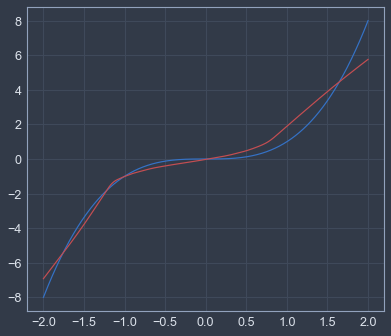

In [135]:
test = np.linspace(-2,2,1000)
plt.plot(test,test**3)
test_y = model(torch.linspace(-2,2,1000).reshape(1000,1))
plt.plot(test,test_y.detach().numpy(),color="r")
plt.show()

tensor([[0.3113],
        [0.3119],
        [0.3124],
        [0.3130],
        [0.3136],
        [0.3141],
        [0.3147],
        [0.3153],
        [0.3159],
        [0.3164],
        [0.3170],
        [0.3176],
        [0.3182],
        [0.3188],
        [0.3193],
        [0.3199],
        [0.3205],
        [0.3211],
        [0.3217],
        [0.3223],
        [0.3228],
        [0.3234],
        [0.3240],
        [0.3246],
        [0.3252],
        [0.3258],
        [0.3264],
        [0.3270],
        [0.3275],
        [0.3281],
        [0.3287],
        [0.3293],
        [0.3299],
        [0.3305],
        [0.3311],
        [0.3318],
        [0.3324],
        [0.3330],
        [0.3336],
        [0.3342],
        [0.3348],
        [0.3355],
        [0.3361],
        [0.3368],
        [0.3374],
        [0.3380],
        [0.3387],
        [0.3394],
        [0.3400],
        [0.3407],
        [0.3414],
        [0.3421],
        [0.3428],
        [0.3435],
        [0.3442],
        [0